<a href="https://colab.research.google.com/github/Sakshi04lLande/SakshiLande/blob/main/Brainwave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1 : Create a sale data analysis of any commercial store.


Import Necessary Libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the Dataset

In [6]:

df = pd.read_csv('/content/Sample - Superstore.csv',encoding='latin1')

print(df.head())
print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

Basic Data Exploration

In [7]:

print(df.shape)

print(df.isnull().sum())


print(df.describe())


print(df.info())

(9994, 21)
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64
            Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.94000

Sales Analysis

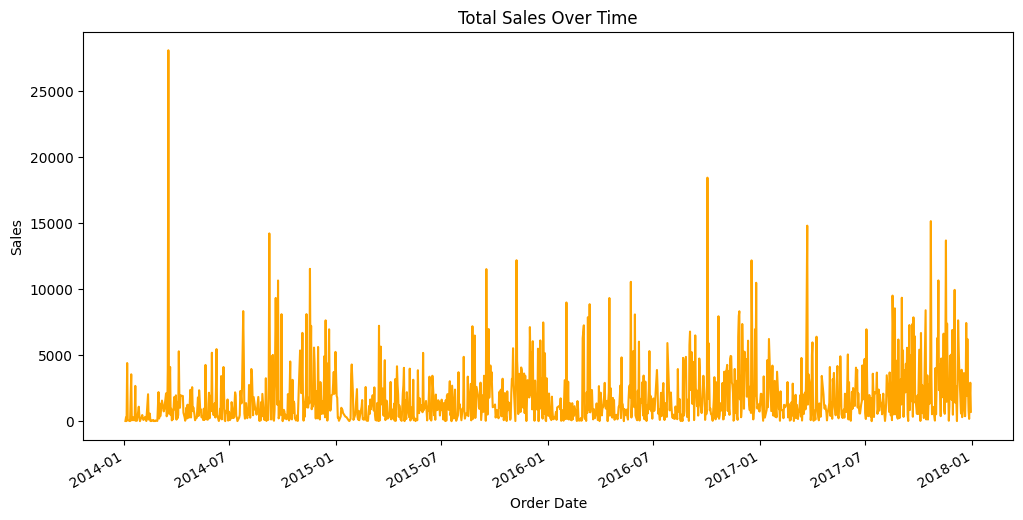

In [8]:

df['Order Date'] = pd.to_datetime(df['Order Date'])


sales_over_time = df.groupby('Order Date')['Sales'].sum()


plt.figure(figsize=(12, 6))
sales_over_time.plot(color='orange')
plt.title('Total Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()

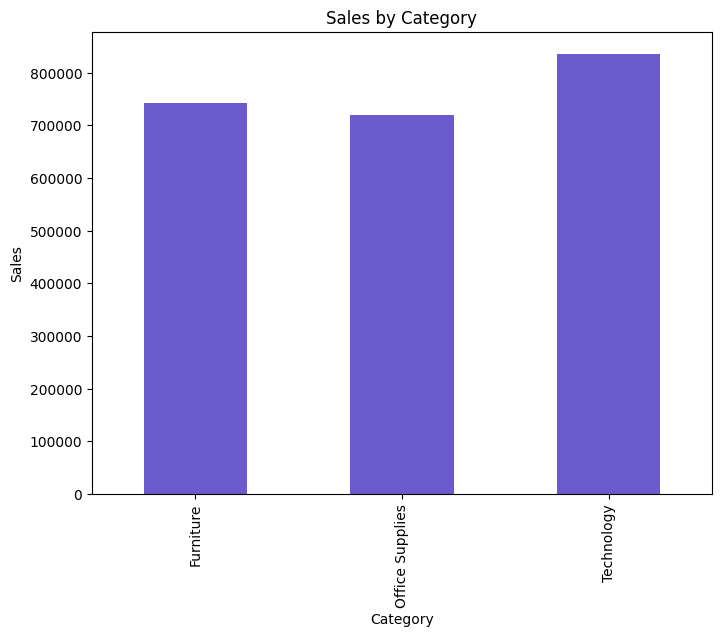

In [9]:

sales_by_category = df.groupby('Category')['Sales'].sum()

plt.figure(figsize=(8, 6))
sales_by_category.plot(kind='bar',color='slateblue')
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

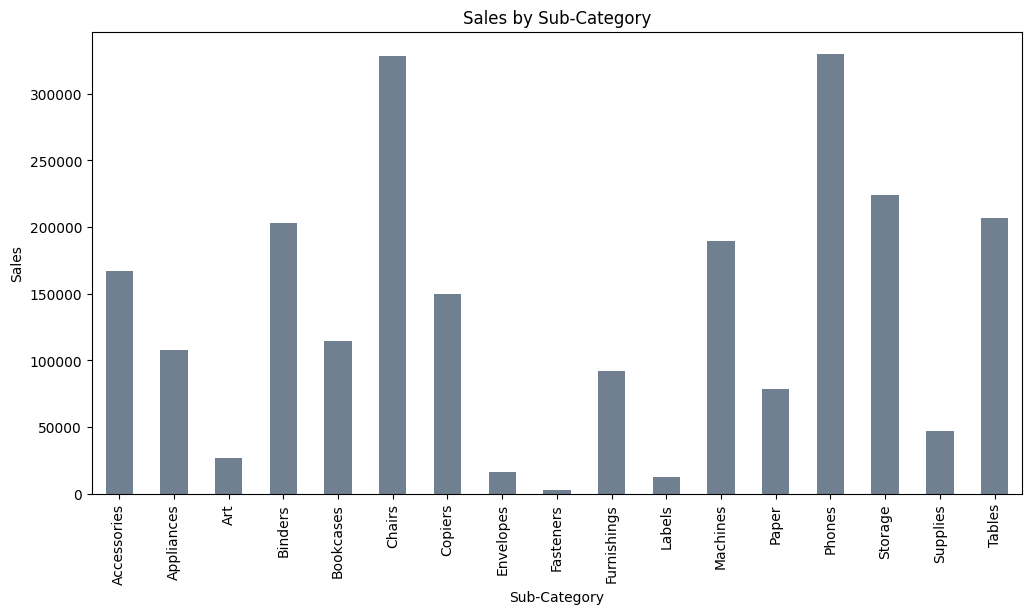

In [10]:

sales_by_subcategory = df.groupby('Sub-Category')['Sales'].sum()


plt.figure(figsize=(12, 6))
sales_by_subcategory.plot(kind='bar',color='slategray')
plt.title('Sales by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Sales')
plt.show()

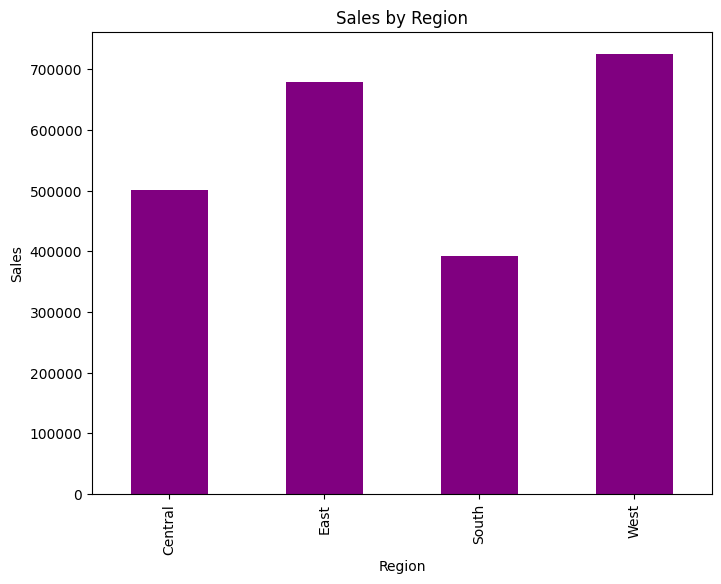

In [11]:

sales_by_region = df.groupby('Region')['Sales'].sum()


plt.figure(figsize=(8, 6))
sales_by_region.plot(kind='bar',color='purple')
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()

Profit Analysis

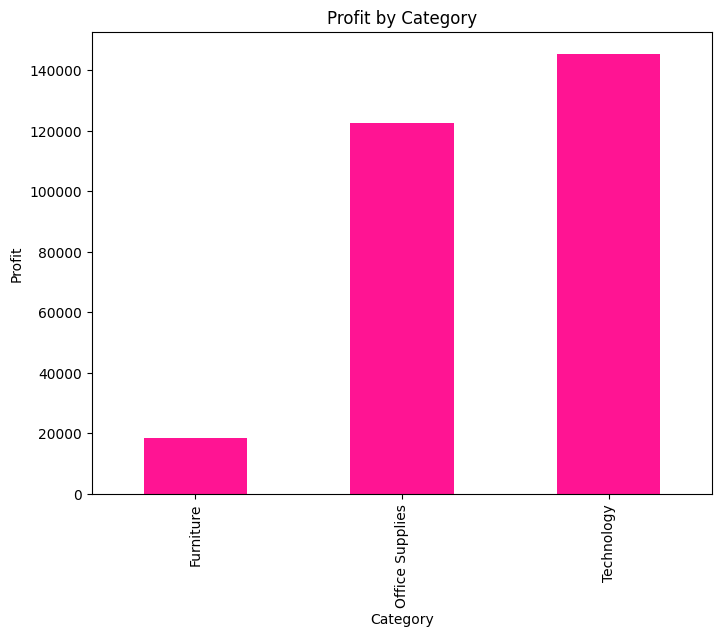

In [12]:

profit_by_category = df.groupby('Category')['Profit'].sum()

plt.figure(figsize=(8, 6))
profit_by_category.plot(kind='bar',color='deeppink')
plt.title('Profit by Category')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.show()

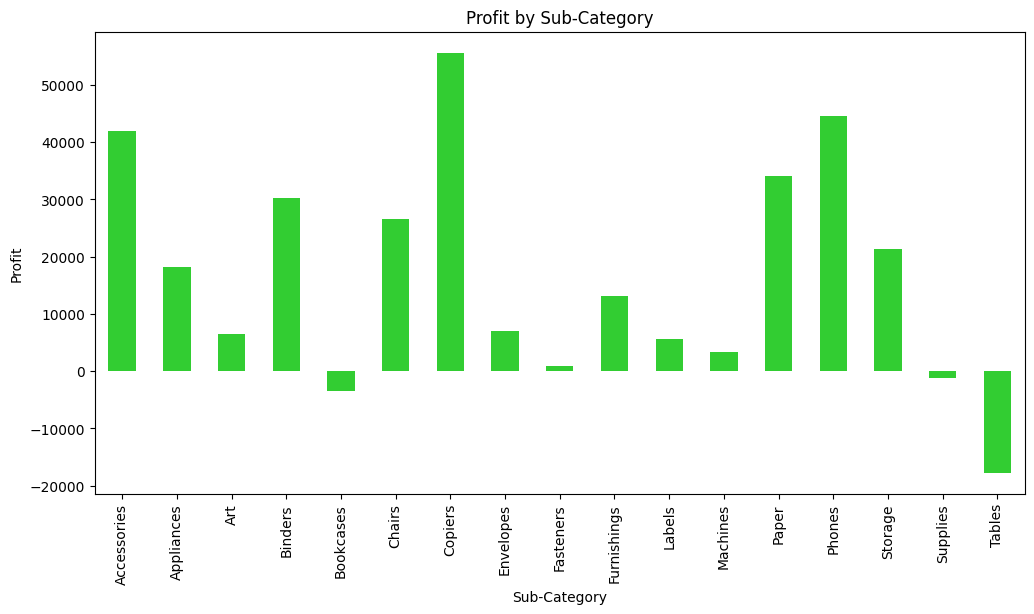

In [13]:

profit_by_subcategory = df.groupby('Sub-Category')['Profit'].sum()

plt.figure(figsize=(12, 6))
profit_by_subcategory.plot(kind='bar',color='limegreen')
plt.title('Profit by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Profit')
plt.show()

Discount Analysis

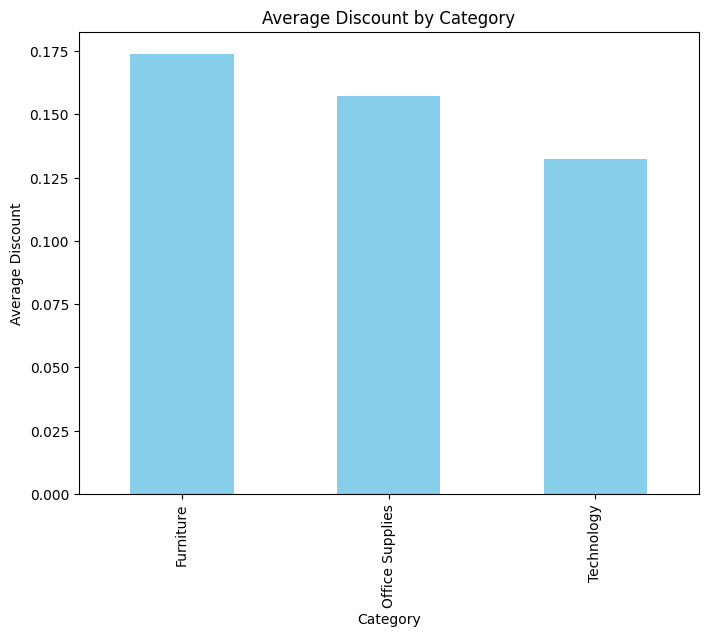

In [14]:

avg_discount_by_category = df.groupby('Category')['Discount'].mean()

plt.figure(figsize=(8, 6))
avg_discount_by_category.plot(kind='bar',color='skyblue')
plt.title('Average Discount by Category')
plt.xlabel('Category')
plt.ylabel('Average Discount')
plt.show()

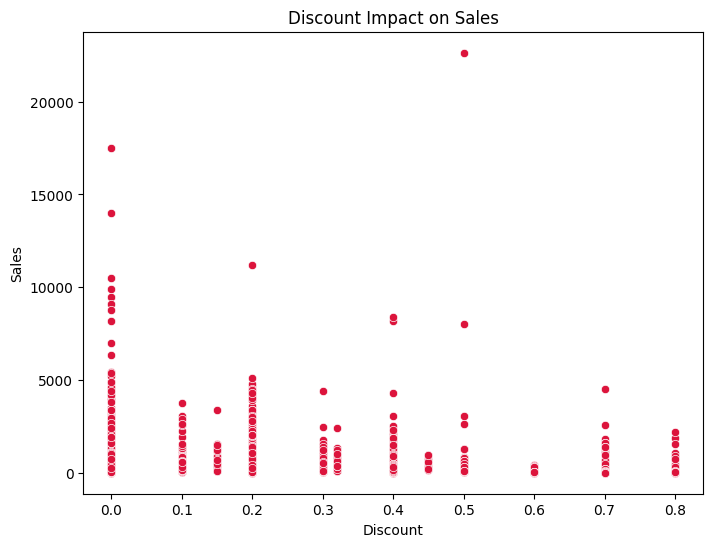

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Discount', y='Sales', data=df,color='#DC143C')
plt.title('Discount Impact on Sales')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.show()

 Customer Analysis

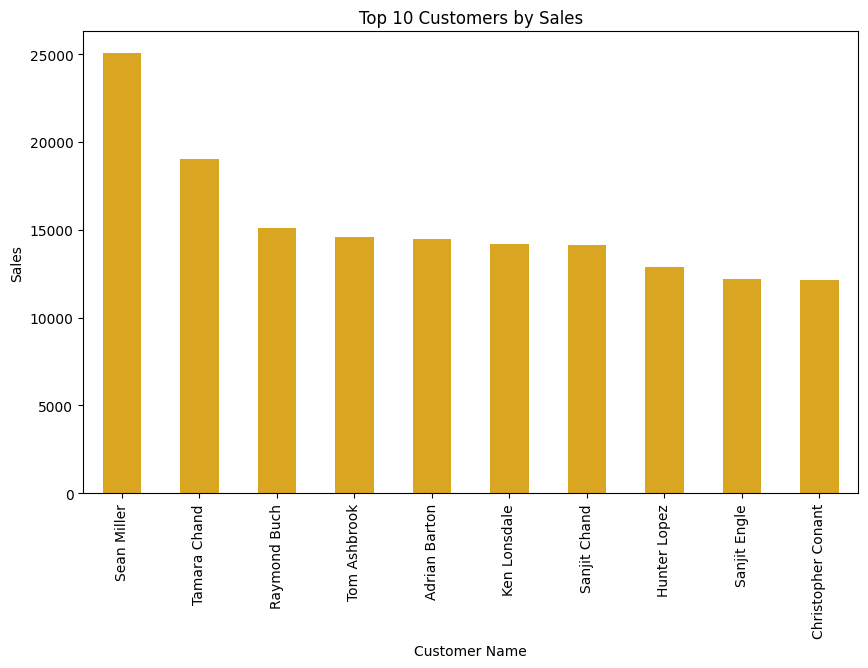

In [16]:
top_customers_by_sales = df.groupby('Customer Name')['Sales'].sum().nlargest(10)

plt.figure(figsize=(10, 6))
top_customers_by_sales.plot(kind='bar',color='goldenrod')
plt.title('Top 10 Customers by Sales')
plt.xlabel('Customer Name')
plt.ylabel('Sales')
plt.show()

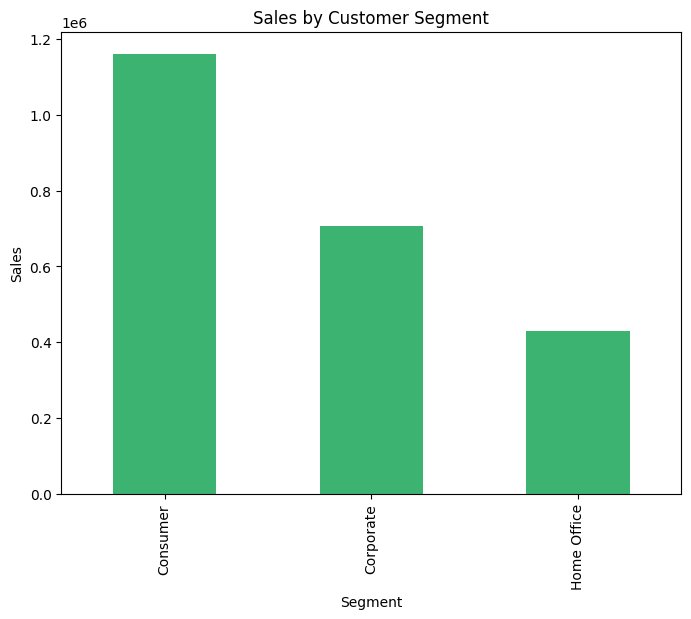

In [17]:
sales_by_segment = df.groupby('Segment')['Sales'].sum()

plt.figure(figsize=(8, 6))
sales_by_segment.plot(kind='bar',color='mediumseagreen')
plt.title('Sales by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.show()

Product Analysis

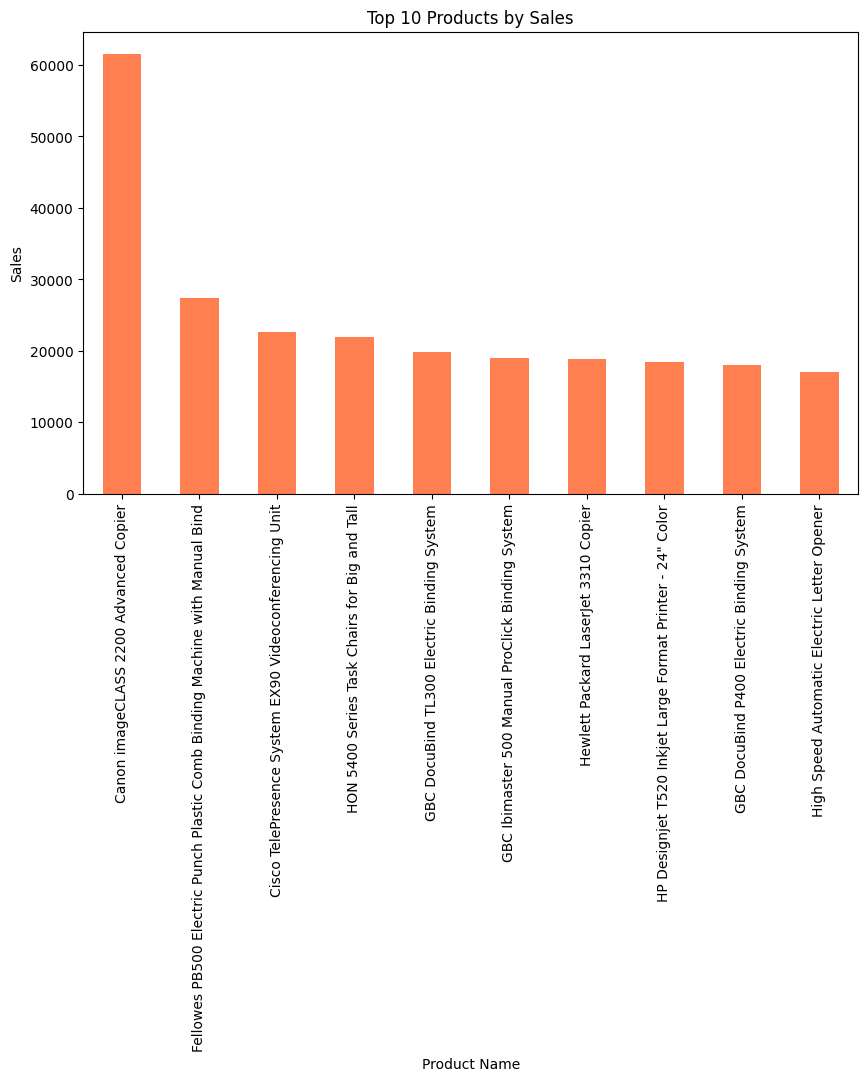

In [18]:
top_products_by_sales = df.groupby('Product Name')['Sales'].sum().nlargest(10)

plt.figure(figsize=(10, 6))
top_products_by_sales.plot(kind='bar',color='coral')
plt.title('Top 10 Products by Sales')
plt.xlabel('Product Name')
plt.ylabel('Sales')
plt.show()

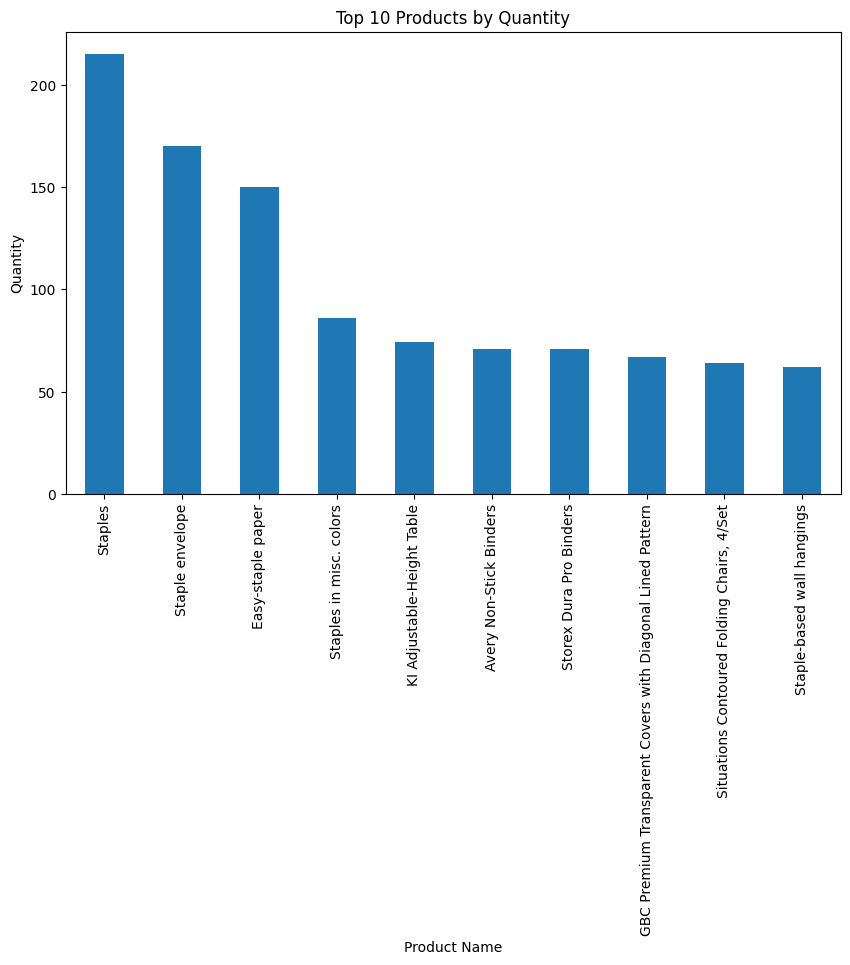

In [19]:
top_products_by_quantity = df.groupby('Product Name')['Quantity'].sum().nlargest(10)

plt.figure(figsize=(10, 6))
top_products_by_quantity.plot(kind='bar')
plt.title('Top 10 Products by Quantity')
plt.xlabel('Product Name')
plt.ylabel('Quantity')
plt.show()

 Correlation Analysis

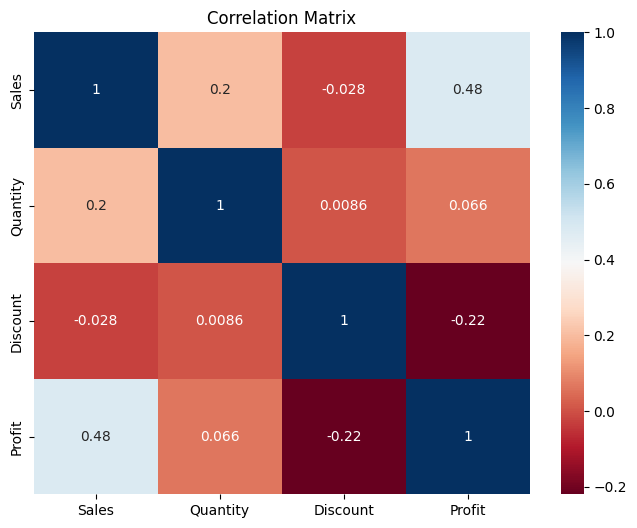

In [20]:
correlation_matrix = df[['Sales', 'Quantity', 'Discount', 'Profit']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu')
plt.title('Correlation Matrix')
plt.show()

In [21]:

df.to_csv('sales_analysis_results.csv', index=False)